In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [2]:
dtypes={'educ':'category',
        'occupation':'category', 'occupation_husb':'category',
        'affair':np.bool}
data=pd.read_csv("enquete_couples.csv",index_col=0, dtype=dtypes)

In [3]:
data.dtypes

rate_marriage       float64
age                 float64
yrs_married         float64
children            float64
religious           float64
educ               category
occupation         category
occupation_husb    category
affair                 bool
dtype: object

In [4]:
data.groupby('affair').mean()

rate_marriage        age  yrs_married  children  religious
affair                                                            
False        4.329701  28.390679     7.989335  1.238813   2.504521
True         3.647345  30.537019    11.152460  1.728933   2.261568

In [5]:
data.groupby('rate_marriage').mean()

age  yrs_married  children  religious    affair
rate_marriage                                                       
1.0            33.823232    13.914141  2.308081   2.343434  0.747475
2.0            30.471264    10.727011  1.735632   2.330460  0.635057
3.0            30.008056    10.239174  1.638469   2.308157  0.550856
4.0            28.856601     8.816905  1.369536   2.400981  0.322926
5.0            28.574702     8.311662  1.252794   2.506334  0.181446

In [6]:
# show plots in the notebook
%matplotlib inline

Text(0, 0.5, 'Frequence')

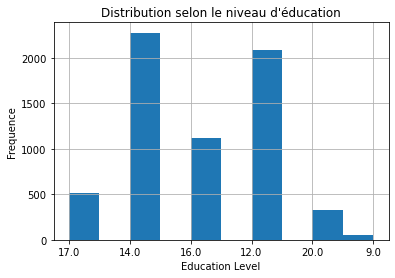

In [7]:
# histogram of education
data.educ.hist()
plt.title('Distribution selon le niveau d\'éducation')
plt.xlabel('Education Level')
plt.ylabel('Frequence')

Text(0, 0.5, 'Frequences')

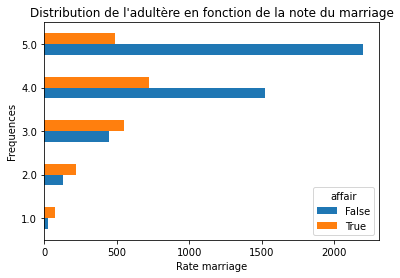

In [8]:
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind='barh')
plt.title('Distribution de l\'adultère en fonction de la note du marriage')
plt.xlabel('Rate marriage')
plt.ylabel('Frequences')

Text(0, 0.5, 'Percentage')

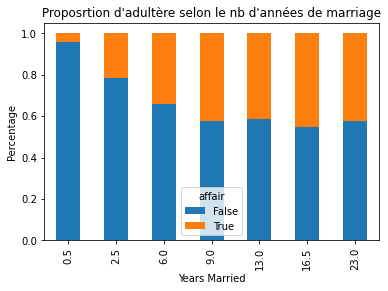

In [9]:
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Proposrtion d\'adultère selon le nb d\'années de marriage')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

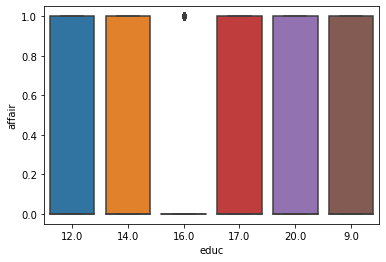

In [10]:
import seaborn as sns
data['educ']=data.educ.astype('category')
sns.boxplot(x="educ", y="affair", data=data)

In [11]:
X=data.iloc[:,:-1]
Y=data['affair']
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=Y)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
modele = LogisticRegression()

In [14]:
X_train.shape

(4774, 8)

In [15]:
Y_train.shape

(4774,)

In [16]:
#modele.fit(preprocessing.scale(X_train), Y_train)
modele.fit(X_train, Y_train)

LogisticRegression()

In [17]:
prediction = modele.predict(X_test)

In [18]:
np.mean(prediction == Y_test)

0.7167085427135679

In [19]:
modele.score(X_test, Y_test)

0.7167085427135679

In [20]:
modele.score(X_train, Y_train)

0.7270632593213239

In [21]:
from sklearn import metrics
confusion = metrics.confusion_matrix(Y_test, prediction)
print(confusion)

[[952 127]
 [324 189]]


In [22]:
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 189
True Negatives: 952
False Positives: 127
False Negatives: 324


In [23]:
x=[[4,25,3,1,4,16,4,2]]

In [24]:
modele.predict(x)

array([False])

In [25]:
"""
marriage : 3
age : 32
10 ans
2 enfants
religion 2
education 16 :  college graduate
occupation 5 : managerial/business
occupation husband 5 : managerial/business
"""
x=[[3,20,2,1,5,16,5,5]]
modele.predict_proba(x)

array([[0.7378425, 0.2621575]])

In [58]:
from sklearn import tree

X=data.iloc[:,:-1]
y=data['affair']
X_train , X_test , y_train , y_test = train_test_split (X,y , test_size =0.25,random_state=1,stratify= y)
#instanciation de l'arbre
from sklearn.tree import DecisionTreeClassifier
test= DecisionTreeClassifier(min_samples_split =30,min_samples_leaf=15)
test.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=30)

In [59]:
pred = test.predict(X_test)
#matrice de confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))
print(test.score(X_test,y_test))


[[931 148]
 [309 204]]
0.7129396984924623


In [60]:
x=[[3,20,2,1,5,16,5,5]]
test.predict_proba(x)

array([[0.26666667, 0.73333333]])